# PYGAD

PyGAD is a Python library designed to simplify the implementation and use of genetic algorithms (GAs). These algorithms, inspired by biological evolution, are used for tackling complex optimization and search problems by progressively enhancing solutions through simulated evolutionary processes.

## Key Components of PyGAD:

Initial Population: Users can start the genetic algorithm process with either a randomly generated population or a predefined one, establishing the foundation for the optimization.

Fitness Function: Essential to genetic algorithms, this function assesses how well a solution meets a defined goal. PyGAD allows for the customization of fitness functions, making it possible to address particular challenges with precision.

Selection: PyGAD supports various methods for selecting individuals from the population to reproduce, including roulette wheel and tournament selection. These methods help determine the genetic makeup of subsequent generations.

Crossover and Mutation: These operations are vital for introducing new genetic variations into the population. Crossover combines the genetic information from two parents to generate offspring, while mutation introduces random genetic changes, aiding in the exploration of new solutions.

# NSGA-II

PyGAD includes NSGA-II, an approach well-suited for tasks that involve optimizing multiple objectives, often referred to as Pareto optimality. This approach identifies a set of solutions that represent the best trade-offs among competing objectives.

### NSGA-II Explained

NSGA-II expands the capabilities of genetic algorithms to handle several conflicting objectives simultaneously. Rather than seeking a single optimal solution, multi-objective optimization aims to find a set of solutions, each offering a favorable compromise among various objectives.

In PyGAD, when the fitness function outputs multiple values—each for a different objective—the problem is managed as multi-objective. NSGA-II approaches this by employing techniques like non-dominated sorting and crowding distance calculations. These techniques help maintain a diverse population and clearly identify the Pareto front, which includes top-performing solutions across all objectives.

/opt/miniconda3/envs/OR/lib/python3.12/site-packages/pygad/pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/opt/miniconda3/envs/OR/lib/python3.12/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


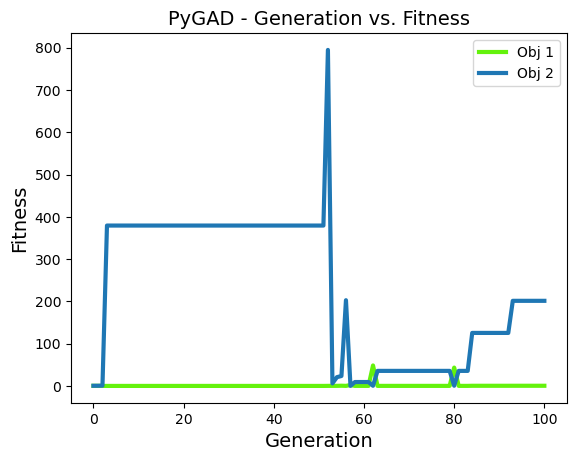

Parameters of the best solution: [ 3.6531622  -0.26673333 -4.91579879  1.55165092 -4.69874899  1.03595027]
Fitness values of the best solution: [  0.39740133 201.28548649]
Predicted output 1 based on the best solution: 52.5163469211481
Predicted output 2 based on the best solution: 30.004967068078106


In [2]:
import pygad
import numpy
import warnings

function_inputs1 = [4, -2, 3.5, 5, -11, -4.7]  # Function 1 inputs.
function_inputs2 = [-2, 0.7, -9, 1.4, 3, 5]    # Function 2 inputs.
target_output1 = 50                            # Function 1 output.
target_output2 = 30                            # Function 2 output.

def fitness_func(ga_instance, solution, solution_idx):
    output1 = numpy.sum(solution * function_inputs1)
    output2 = numpy.sum(solution * function_inputs2)
    # To avoid division by very small numbers, we add a small constant (epsilon).
    epsilon = 0.000001
    # Calculating the inverse of absolute error for each objective to maximize fitness
    fitness1 = 1.0 / (numpy.abs(output1 - target_output1) + epsilon)
    fitness2 = 1.0 / (numpy.abs(output2 - target_output2) + epsilon)
    return [fitness1, fitness2]

num_generations = 100
num_parents_mating = 10
sol_per_pop = 20
num_genes = len(function_inputs1)

# Create the GA instance
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       parent_selection_type='nsga2')

# Run the GA
ga_instance.run()

# Plot the fitness values
ga_instance.plot_fitness(label=['Obj 1', 'Obj 2'])

# Fetch the best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Parameters of the best solution: {solution}")
print(f"Fitness values of the best solution: {solution_fitness}")

# Predict the outputs for both functions based on the best solution
prediction1 = numpy.sum(numpy.array(function_inputs1) * solution)
prediction2 = numpy.sum(numpy.array(function_inputs2) * solution)
print(f"Predicted output 1 based on the best solution: {prediction1}")
print(f"Predicted output 2 based on the best solution: {prediction2}")
